In [13]:
import numpy as np
from mnist.loader import MNIST
import matplotlib.pyplot as plt
%matplotlib inline
import os
import umap
import seaborn as sns
sns.set(style='white', context='poster')

In [20]:
mndata = MNIST('./data')
train, train_labels = mndata.load_training()
test, test_labels = mndata.load_testing()
data = np.array(np.vstack([train, test]), dtype=np.float64) / 255.0
target = np.hstack([train_labels, test_labels])
classes = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot']

In [21]:
%%time
embedding = umap.UMAP().fit_transform(data, y=target)

CPU times: user 5min 41s, sys: 1min, total: 6min 42s
Wall time: 2min 23s


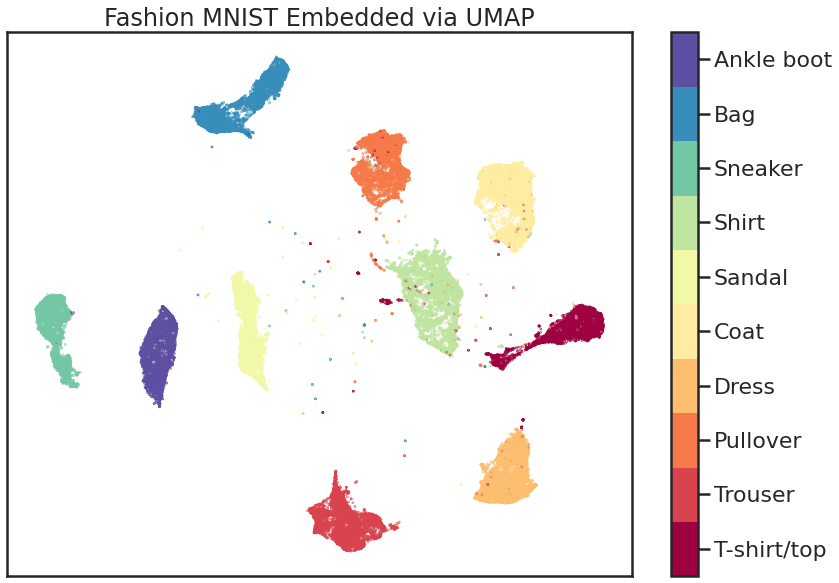

In [18]:
fig, ax = plt.subplots(1, figsize=(14, 10))
plt.scatter(*embedding.T, s=0.3, c=target, cmap='Spectral', alpha=1.0)
plt.setp(ax, xticks=[], yticks=[])
cbar = plt.colorbar(boundaries=np.arange(len(classes))-0.5)
cbar.set_ticks(np.arange(len(classes)))
cbar.set_ticklabels(classes)
plt.title('Fashion MNIST Embedded via UMAP');